In [1]:
import os, glob
import numpy as np, pandas as pd, matplotlib.pyplot as plt
plt.style.use('ggplot')

In [19]:
def get_results(clf):
    results = {'accuracy': {1: [], 5: [], 10: [], 15: [], 20:[]}}
    
    for file in glob.glob(os.path.join('experiments', 'preprocess', 'filter', clf, '*')):
        window_size = int(os.path.basename(file).split('filter validation ')[0])
        with open(file, 'r') as f:
            for line in f:
                key, value = line.strip('\n').split(': ')
                if key in results.keys():
                    results[key][window_size].append(float(value))
                    
    # Convert to numpy array
    results = {k1:{k2:np.array(d2) for k2, d2 in d1.items()} for k1, d1 in results.items()}
        
    # Calculate means and stds
    means = {k1:{k2:np.mean(d2) for k2, d2 in d1.items()} for k1, d1 in results.items()}
    stds = {k1:{k2:np.std(d2)/np.sqrt(5) for k2, d2 in d1.items()} for k1, d1 in results.items()}
                    
    return means, stds

def plot(means, stds, field, xlabel, ylabel, ylim=None, color=None, figsize=None):    
    window_sizes = (1, 5, 10, 15, 20)
    labels = [str(i) for i in window_sizes]
    ms, es = np.array([means[field][m] for m in window_sizes]), np.array([stds[field][m] for m in window_sizes])
    x_pos = range(len(window_sizes))
    
    # Build the plot
    fig, ax = plt.subplots(figsize=figsize)
    ax.bar(x_pos, ms, yerr=es, align='center', alpha=0.7, color=color, ecolor='black', capsize=10, error_kw=dict(lw=1, capsize=3, capthick=1))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels)
    ax.set_ylim(ylim)

    # Save the figure and show
    plt.tight_layout()
    plt.savefig('val-filter-{}-{}.pdf'.format(?, field))
    plt.show()

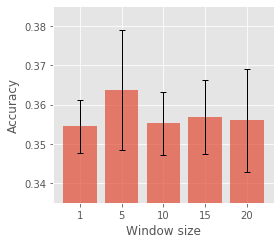

In [18]:
plot(*get_results('hmm'), 'accuracy', 'Window size', 'Accuracy', ylim=(0.335, 0.385), figsize=(4, 3.5))

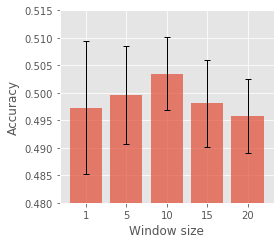

In [20]:
plot(*get_results('ffnn'), 'accuracy', 'Window size', 'Accuracy', ylim=(0.48, 0.515), figsize=(4, 3.5))